In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits

(1797, 64)


<Figure size 432x288 with 0 Axes>

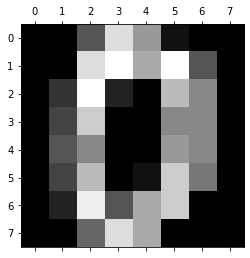

In [3]:
df=load_digits()
print(df.data.shape)
plt.gray()
plt.matshow(df.images[0])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df.data,df.target,test_size=0.3)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### Logistic Regression 

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr=LogisticRegression()

In [9]:
lr.fit(x_train,y_train)

LogisticRegression()

In [10]:
lr.score(x_test,y_test)

0.9629629629629629

### SVM

In [11]:
from sklearn.svm import SVC

In [12]:
sv=SVC()

In [13]:
sv.fit(x_train,y_train)

SVC()

In [14]:
sv.score(x_test,y_test)

0.9814814814814815

### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
RF= RandomForestClassifier(n_estimators=5)
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [17]:
RF.score(x_test,y_test)

0.9055555555555556

### K fold Validation

In [18]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [19]:
from sklearn.model_selection import KFold

In [20]:
fold=KFold(n_splits=3)

In [21]:
score_lr=[]
score_sv=[]
score_rf=[]
for train_index,test_index in fold.split(df.data,df.target):
    x_train,x_test,y_train,y_test=df.data[train_index],df.data[test_index],df.target[train_index],df.target[test_index]                      
    score_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    score_sv.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    score_rf.append(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))
    

In [22]:
print(score_lr)
print(score_sv)
print(score_rf)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9348914858096828, 0.9616026711185309, 0.9248747913188647]


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(LogisticRegression(),df.data,df.target,cv=3)

array([0.92153589, 0.94156928, 0.91652755])

In [25]:
cross_val_score(SVC(),df.data,df.target,cv=3)

array([0.96494157, 0.97996661, 0.96494157])

In [26]:
cross_val_score(RandomForestClassifier(),df.data,df.target,cv=3)

array([0.94323873, 0.95826377, 0.92654424])

In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
s_fold=StratifiedKFold(n_splits=3)

In [29]:
score_lr=[]
score_sv=[]
score_rf=[]
for train_index,test_index in s_fold.split(df.data,df.target):
    x_train,x_test,y_train,y_test=df.data[train_index],df.data[test_index],df.target[train_index],df.target[test_index]                      
    score_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    score_sv.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    score_rf.append(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))
    

In [30]:
print(score_lr)
print(score_sv)
print(score_rf)

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]
[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]
[0.9382303839732888, 0.9482470784641068, 0.9382303839732888]


### GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn import svm

In [33]:
gs = GridSearchCV(svm.SVC(gamma='auto'), {'C': [1,10,20], 'kernel' : ['linear', 'poly']}, 
                  cv = 5, return_train_score= False)

In [34]:
x = df.data
y = df.target

In [35]:
gs.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'poly']})

In [36]:
gs.cv_results_

{'mean_fit_time': array([0.02729883, 0.03105698, 0.02631536, 0.03185167, 0.02756047,
        0.03073115]),
 'std_fit_time': array([0.00348173, 0.00099064, 0.00238983, 0.00275515, 0.00202957,
        0.00216763]),
 'mean_score_time': array([0.00810595, 0.00807462, 0.00619574, 0.0086412 , 0.00836267,
        0.00802469]),
 'std_score_time': array([0.00257717, 0.00081737, 0.00073574, 0.00207129, 0.00097791,
        0.00131405]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'linear', 'poly', 'linear', 'poly'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'poly'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'poly'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'pol

In [37]:
data_gs = pd.DataFrame(gs.cv_results_)

In [38]:
data_gs = data_gs[['param_C', 'param_kernel', 'mean_test_score']]
data_gs

,param_C,param_kernel,mean_test_score
0,1,linear,0.947697
1,1,poly,0.968842
2,10,linear,0.947697
3,10,poly,0.968842
4,20,linear,0.947697
5,20,poly,0.968842


In [39]:
gs.best_params_

{'C': 1, 'kernel': 'poly'}

In [40]:
gs.best_score_

0.96884246363355

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'), {'C' : [1,10,20], 'kernel': ['linear', 'poly']}, cv = 5, return_train_score = False, n_iter = 2)

In [43]:
rs.fit(x,y)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['linear', 'poly']})

In [44]:
rs.cv_results_

{'mean_fit_time': array([0.02838964, 0.03637242]),
 'std_fit_time': array([0.0022433 , 0.01215327]),
 'mean_score_time': array([0.00921216, 0.00909901]),
 'std_score_time': array([0.00096838, 0.00155971]),
 'param_kernel': masked_array(data=['poly', 'poly'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[20, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'poly', 'C': 20}, {'kernel': 'poly', 'C': 1}],
 'split0_test_score': array([0.98333333, 0.98333333]),
 'split1_test_score': array([0.94444444, 0.94444444]),
 'split2_test_score': array([0.98050139, 0.98050139]),
 'split3_test_score': array([0.98885794, 0.98885794]),
 'split4_test_score': array([0.94707521, 0.94707521]),
 'mean_test_score': array([0.96884246, 0.96884246]),
 'std_test_score': array([0.01905577, 0.01905577]),
 'rank_test_score': array([1, 1])}

In [45]:
data_rs = pd.DataFrame(rs.cv_results_)

In [46]:
data_rs = data_rs[['param_C', 'param_kernel', 'mean_test_score']]
data_rs

,param_C,param_kernel,mean_test_score
0,20,poly,0.968842
1,1,poly,0.968842


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_parm = {
    'svm': {
        'model': svm.SVC(gamma ='auto'), 
        'params': {
            'C': [1,10,20],
                    'kernel': ['linear', 'poly']
        }
    }, 'RandomForest': {
        'model': RandomForestClassifier(), 
        'params': {'n_estimators': [1,5,10]
                   }
        
    }, 
    'Logistic_regression' : {
        'model': LogisticRegression(), 
        'params': {
            'C': [1,10,20]
        }
    }
}

In [49]:
scores=[]
for model_name,mp in model_parm.items():
    cl=GridSearchCV (mp['model'],mp['params'],cv=5,return_train_score=False)
    cl.fit(x,y)
    scores.append({
        'model':model_name,
        "best_score":cl.best_score_,
        "best_parms":cl.best_params_
    })


In [50]:
d=pd.DataFrame(scores,columns=['model','best_score','best_parms'])

In [51]:
d

,model,best_score,best_parms
0,svm,0.968842,"{'C': 1, 'kernel': 'poly'}"
1,RandomForest,0.911544,{'n_estimators': 10}
2,Logistic_regression,0.913765,{'C': 1}
